In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 2.07MB/s]


In [ ]:
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 3.65MB/s]


In [ ]:
movies = pd.read_csv("movies.csv")
directors = pd.read_csv("directors.csv")

In [ ]:
movies.shape

(1465, 12)

In [ ]:
directors.shape

(2349, 4)

In [ ]:
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
directors.head()

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male


In [ ]:
movies.drop(columns=['Unnamed: 0'], inplace = True)
directors.drop(columns=['Unnamed: 0'], inplace = True)

In [ ]:
directors.head()

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [ ]:
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
data = movies.merge(directors, left_on = 'director_id', right_on='id', )
data.shape

(1465, 14)

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,James Cameron,4762,Male
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,James Cameron,4762,Male
3,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,James Cameron,4762,Male
4,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,James Cameron,4762,Male


In [ ]:
data.drop(columns = ['id_x', 'id_y', 'director_id', 'day'], inplace = True)

In [ ]:
data.head()

,budget,popularity,revenue,title,vote_average,vote_count,year,month,director_name,gender
0,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,James Cameron,Male
1,200000000,100,1845034188,Titanic,7.5,7562,1997,Nov,James Cameron,Male
2,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,1991,Jul,James Cameron,Male
3,115000000,38,378882411,True Lies,6.8,1116,1994,Jul,James Cameron,Male
4,70000000,24,90000098,The Abyss,7.1,808,1989,Aug,James Cameron,Male


In [ ]:
data['director_name'].value_counts()

Steven Spielberg      26
Martin Scorsese       19
Clint Eastwood        19
Woody Allen           18
Ridley Scott          16
                      ..
Tim Hill               5
Jonathan Liebesman     5
Roman Polanski         5
Larry Charles          5
Nicole Holofcener      5
Name: director_name, Length: 199, dtype: int64

In [ ]:
data.groupby(by='director_name').count()['title'].sort_values(ascending = False)

director_name
Steven Spielberg    26
Clint Eastwood      19
Martin Scorsese     19
Woody Allen         18
Robert Rodriguez    16
                    ..
Paul Weitz           5
John Madden          5
Paul Verhoeven       5
John Whitesell       5
Kevin Reynolds       5
Name: title, Length: 199, dtype: int64

In [ ]:
data.groupby(by='director_name').mean()['vote_average'].sort_values().round(1)

<ipython-input-29-66c595a4d128>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by='director_name').mean()['vote_average'].sort_values().round(1)


director_name
Jason Friedberg       3.5
Uwe Boll              4.0
John Whitesell        5.1
Brian Levant          5.1
Andrzej Bartkowiak    5.2
                     ... 
David Fincher         7.3
Wes Anderson          7.4
David Lynch           7.4
Quentin Tarantino     7.8
Christopher Nolan     7.8
Name: vote_average, Length: 199, dtype: float64

In [ ]:
data.groupby(by='director_name').sum()['revenue'].sort_values().round(1)

<ipython-input-31-6b6da2ab7097>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(by='director_name').sum()['revenue'].sort_values().round(1)


director_name
Paul Schrader              2118891
Atom Egoyan               11723043
Uwe Boll                  12848228
Michael Polish            15973588
Michael Winterbottom      18928871
                           ...    
Christopher Nolan       4227483234
Michael Bay             5832524638
James Cameron           5883569439
Peter Jackson           6498642820
Steven Spielberg        8676739164
Name: revenue, Length: 199, dtype: int64

In [ ]:
data_years = data.groupby(by='director_name')['year'].agg(['min','max', 'count'])
data_years

,min,max,count
director_name,,,
Adam McKay,2004,2015,6
Adam Shankman,2001,2012,8
Alejandro González Iñárritu,2000,2015,6
Alex Proyas,1994,2016,5
Alexander Payne,1999,2013,5
...,...,...,...
Wes Craven,1984,2011,10
Wolfgang Petersen,1981,2006,7
Woody Allen,1977,2013,18


In [ ]:
data_years['active_years'] = data_years['max'] - data_years['min']

In [ ]:
data_years

,min,max,count,active_years
director_name,,,,
Adam McKay,2004,2015,6,11
Adam Shankman,2001,2012,8,11
Alejandro González Iñárritu,2000,2015,6,15
Alex Proyas,1994,2016,5,22
Alexander Payne,1999,2013,5,14
...,...,...,...,...
Wes Craven,1984,2011,10,27
Wolfgang Petersen,1981,2006,7,25
Woody Allen,1977,2013,18,36


In [ ]:
data_years.sort_values(by='count')

,min,max,count,active_years
director_name,,,,
Kevin Reynolds,1991,2016,5,25
George Clooney,2002,2014,5,12
Gavin O'Connor,1999,2016,5,17
Gary Winick,2002,2010,5,8
Michael Apted,1980,2010,5,30
...,...,...,...,...
Spike Lee,1986,2014,16,28
Woody Allen,1977,2013,18,36
Clint Eastwood,1982,2014,19,32


In [ ]:
data_years['movies_per_year'] = data_years['count']/data_years['active_years']

In [ ]:
data_years.head()

,min,max,count,active_years,movies_per_year
director_name,,,,,
Adam McKay,2004,2015,6,11,0.545455
Adam Shankman,2001,2012,8,11,0.727273
Alejandro González Iñárritu,2000,2015,6,15,0.400000
Alex Proyas,1994,2016,5,22,0.227273
Alexander Payne,1999,2013,5,14,0.357143


In [ ]:
data_years.sort_values(by='movies_per_year')

,min,max,count,active_years,movies_per_year
director_name,,,,,
Michael Apted,1980,2010,5,30,0.166667
Sidney Lumet,1976,2006,5,30,0.166667
Robert Redford,1980,2010,5,30,0.166667
Luc Besson,1985,2014,5,29,0.172414
Lawrence Kasdan,1985,2012,5,27,0.185185
...,...,...,...,...,...
Robert Rodriguez,1992,2014,16,22,0.727273
Adam Shankman,2001,2012,8,11,0.727273
Shawn Levy,2002,2014,11,12,0.916667


In [ ]:
# # Most active directors
# - groupby directors
# - active years: "year max - year min"
# - count of movies by directors
# - movies_per years
# - sorted by movies_per years

# Visualisation

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2024-02-22 10:19:34--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.155.174.85, 18.155.174.201, 18.155.174.48, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.155.174.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  --.-KB/s    in 0.06s   

2024-02-22 10:19:34 (33.8 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [ ]:
data = pd.read_csv('final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [ ]:
data.shape

(16652, 11)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [ ]:
data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                      1014
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
TYO                                1
Commseed                           1
Fortyfive                          1
Xing Entertainment                 1
MediaQuest                         1
Name: Publisher, Length: 578, dtype: int64

In [ ]:
# rows where the publisher either EA, Activision, Namco.
top3_pub = data[data['Publisher'].isin(['Electronic Arts', 'Activision', 'Namco Bandai Games'])]
top3_pub.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113
5,8604,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,2.456509,1.435228,3.167419,0.471076,7.536614
6,8306,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880


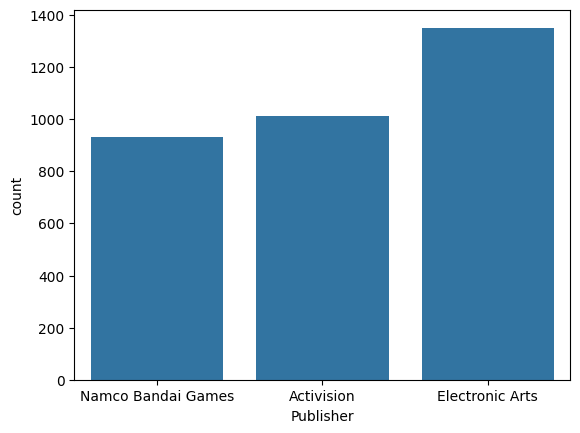

In [ ]:
sns.countplot(data = top3_pub,  x= 'Publisher');

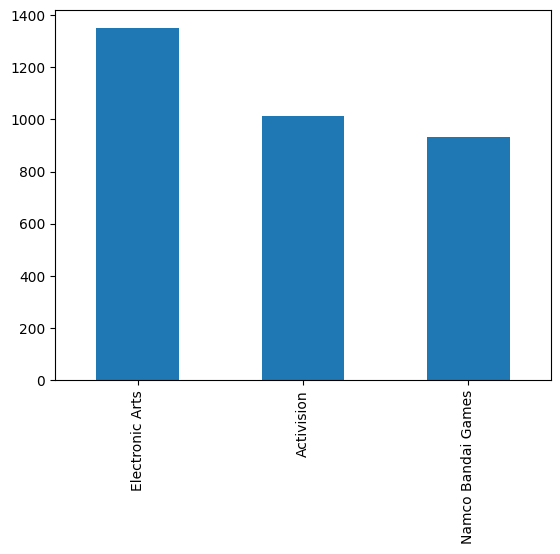

In [ ]:
top3_pub['Publisher'].value_counts().plot(kind='bar');

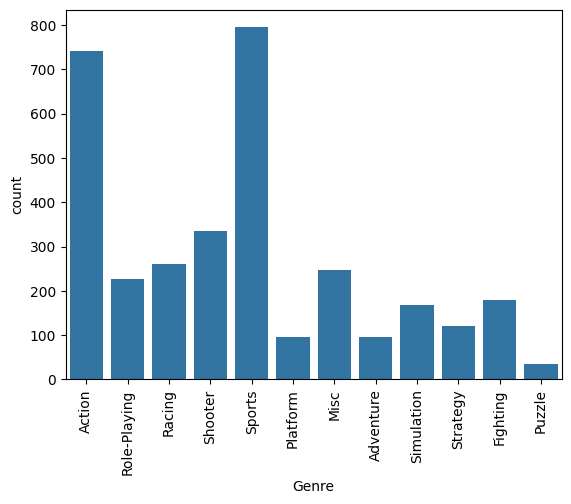

In [ ]:
sns.countplot(data = top3_pub,  x= 'Genre')
plt.xticks(rotation = 90)

plt.show()

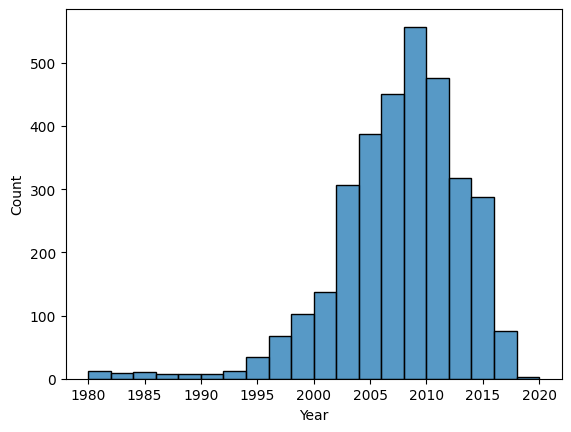

In [ ]:
sns.histplot(data = top3_pub, x = 'Year', bins = 20)
plt.show()

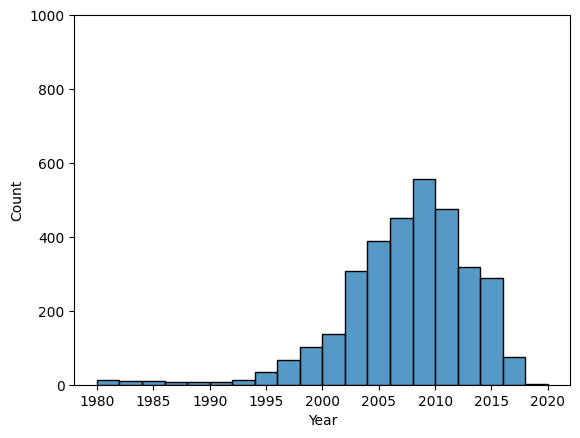

In [ ]:
sns.histplot(data = top3_pub, x = 'Year', bins = 20)
plt.ylim(0, 1000)
plt.show()

<Axes: xlabel='Year', ylabel='Density'>

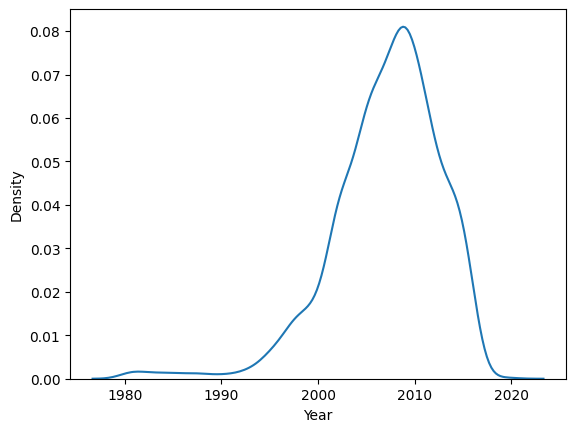

In [ ]:
sns.kdeplot(data = top3_pub, x = 'Year',)

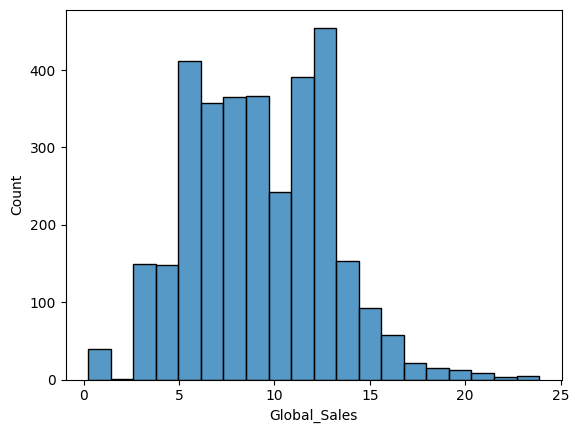

In [ ]:
sns.histplot(data = top3_pub, x = 'Global_Sales', bins = 20)
plt.show()

In [ ]:
top3_pub.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113
5,8604,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,2.456509,1.435228,3.167419,0.471076,7.536614
6,8306,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880


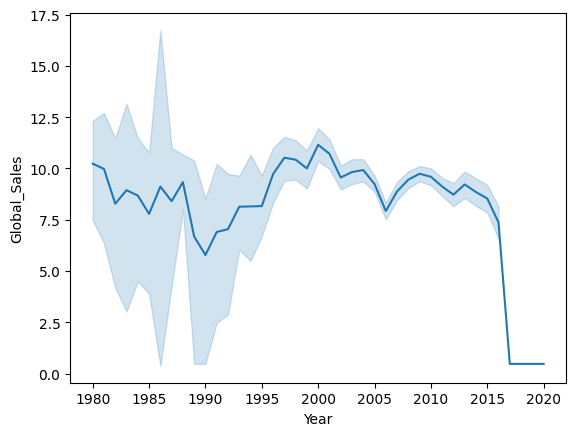

In [ ]:
sns.lineplot(data = top3_pub, x = 'Year', y='Global_Sales')
plt.show()

In [ ]:
ih = data[data['Name'] == "Ice Hockey"]
ih.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6073,639,Ice Hockey,NES,1988.0,Sports,Nintendo,0.44,3.860566,4.751539,2.004268,15.855389
6074,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.39,1.493442,2.741701,0.394830,4.956249
6075,4149,Ice Hockey,2600,1991.0,Sports,Activision,0.61,0.020000,0.000000,0.010000,0.470000
6076,4149,Ice Hockey,2600,1992.0,Sports,Activision,0.65,0.020000,0.000000,0.010000,0.470000
6077,4149,Ice Hockey,SNES,1993.0,Sports,Activision,0.68,0.020000,0.000000,0.010000,0.470000


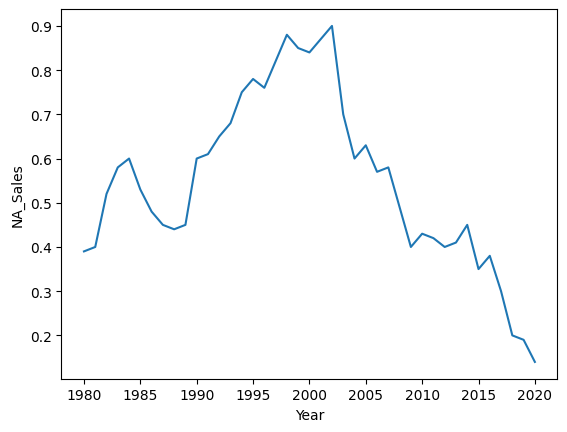

In [ ]:

sns.lineplot(data = ih, x = 'Year', y='NA_Sales')
plt.show()

In [ ]:
baseball = data[data['Name'] == "Baseball"]
baseball.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
941,324,Baseball,NES,1980.0,Sports,Nintendo,0.459000,2.320000,5.230000,1.230000,9.239000
942,422,Baseball,NES,1983.0,Sports,Nintendo,0.468529,2.697415,5.854415,1.087977,10.108336
943,231,Baseball,GB,1985.0,Sports,Nintendo,0.473000,3.074830,6.478831,0.945954,10.972614
944,1144,Baseball,GB,1989.0,Sports,Nintendo,0.478448,3.452245,7.103246,0.803931,11.837870
945,134,Baseball,GB,1992.0,Sports,Nintendo,0.520000,3.829660,7.727661,0.661908,12.739229


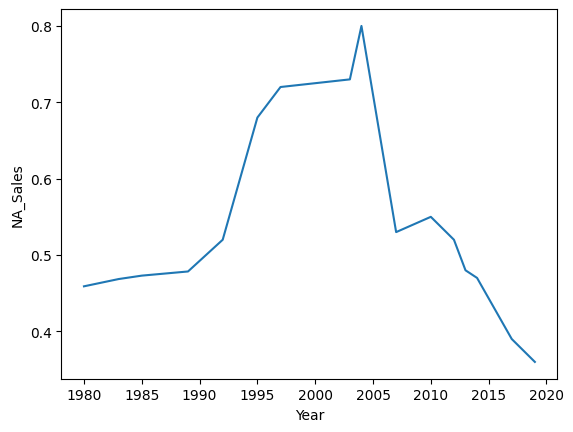

In [ ]:

sns.lineplot(data = baseball, x = 'Year', y='NA_Sales')
plt.show()

In [ ]:
top3_pub.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113
5,8604,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,2.456509,1.435228,3.167419,0.471076,7.536614
6,8306,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880


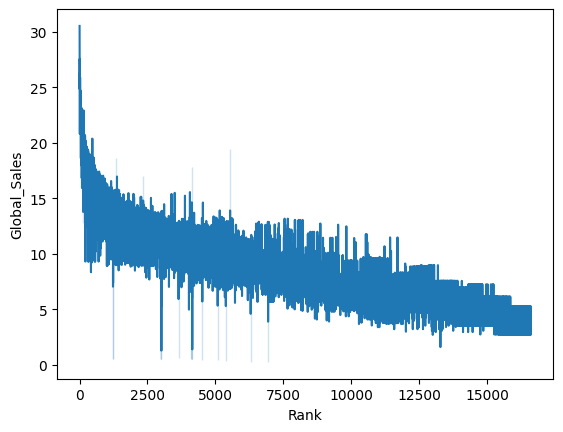

In [ ]:
sns.lineplot(data = data, x = 'Rank', y='Global_Sales')
plt.show()

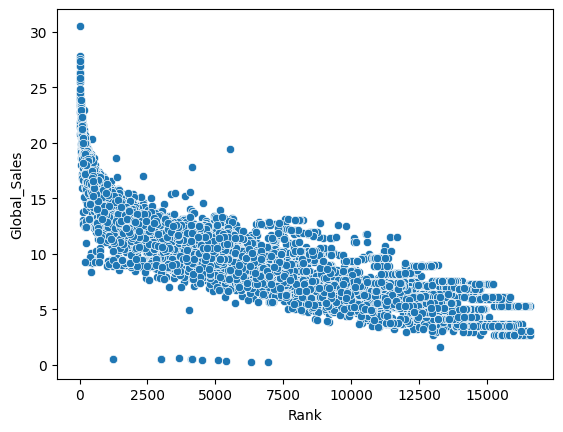

In [ ]:
sns.scatterplot(data = data, x = 'Rank', y='Global_Sales')
plt.show()

In [ ]:
data['Global_Sales'].max()

30.55586186

In [ ]:
data[data['Global_Sales'] > 30.5]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15934,1,Wii Sports,Wii,2006.0,Sports,Nintendo,8.725452,8.367985,6.327075,7.135349,30.555862


In [ ]:
top3_pub.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113
5,8604,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,2.456509,1.435228,3.167419,0.471076,7.536614
6,8306,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880


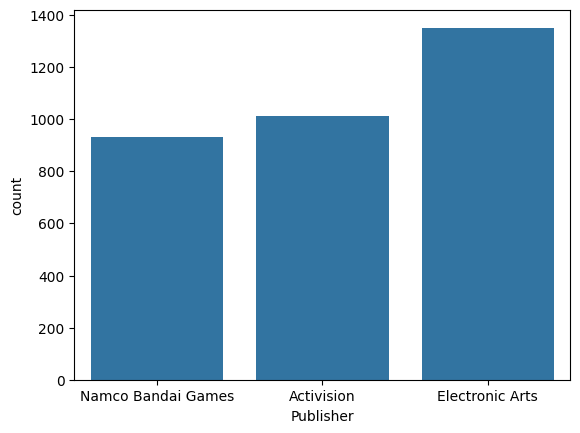

In [ ]:
sns.countplot(data = top3_pub, x = 'Publisher')
plt.show()

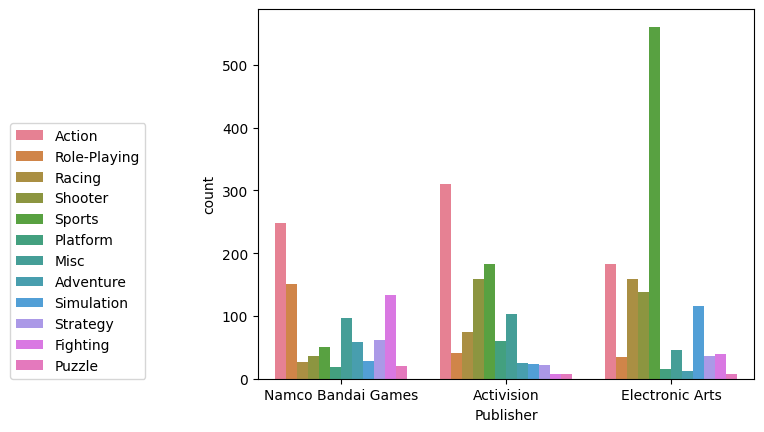

In [ ]:
sns.countplot(data = top3_pub, x = 'Publisher', hue='Genre')
plt.legend(loc=(-0.5, 0))
plt.show()

In [ ]:
top3_pub.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113
5,8604,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,2.456509,1.435228,3.167419,0.471076,7.536614
6,8306,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880


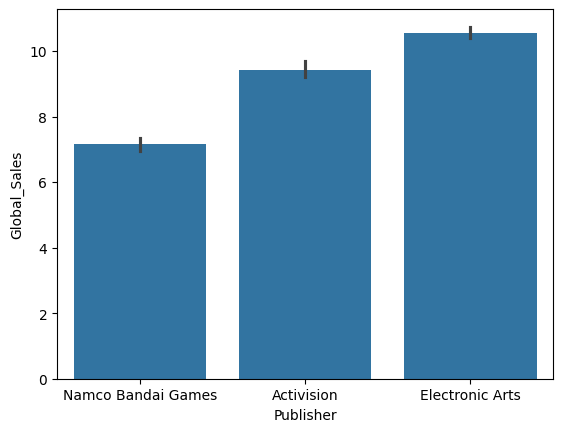

In [ ]:
sns.barplot(data = top3_pub, x = 'Publisher', y='Global_Sales')
plt.show()

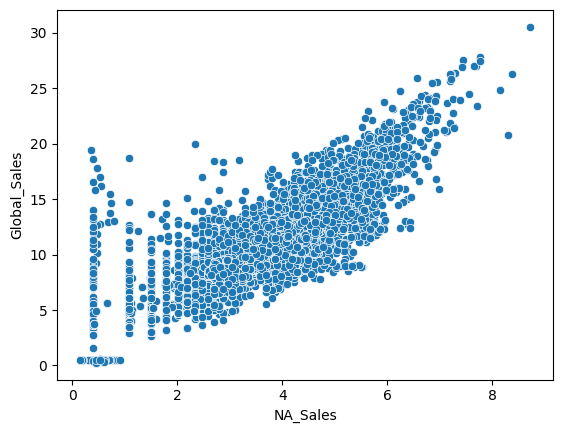

In [ ]:
sns.scatterplot(data = data, x = 'NA_Sales', y='Global_Sales')
plt.show()

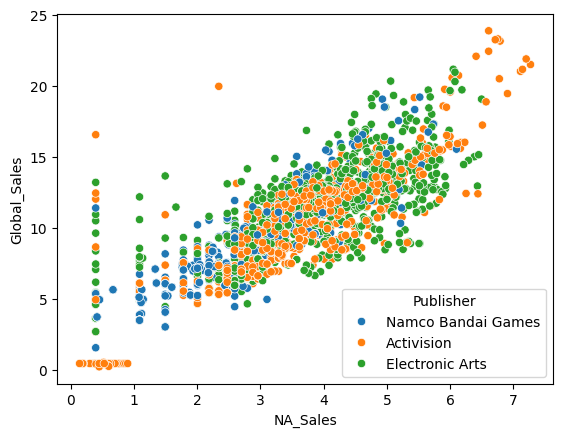

In [ ]:
sns.scatterplot(data = top3_pub, x = 'NA_Sales', y='Global_Sales', hue = 'Publisher')
plt.show()